### Imports

In [42]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, Model
import keras as k

import sklearn
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

from keras.initializers import *

from matplotlib import pyplot as plt
import seaborn as sns
import scipy

from datetime import datetime

import pickle

from PIL import Image

from custom_class import *

print(f"pd.__version__: {pd.__version__}")
print(f"tf.__version__: {tf.__version__}")

image_size = (120, 160)

pd.__version__: 2.2.3
tf.__version__: 2.15.1


### Read file path and labels to list

In [43]:
dataset_dir = "/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Captured_data/processed"

dataset_dir_list = [
    os.path.join(dataset_dir, folder)
    for folder in os.listdir(dataset_dir)
    if os.path.isdir(os.path.join(dataset_dir, folder))
]

csv_path_list = [os.path.join(dir, "_labels.csv") for dir in dataset_dir_list]

csv_df = None

for csv_path in csv_path_list:
    df = pd.read_csv(csv_path, index_col="image_id")
    # # undersampling
    # if "_go" in csv_path:
    #     df = df.sample(frac=0.5, random_state=42)
    # elif "T_" in csv_path:
    #     df = df.sample(frac=0.5, random_state=42)
    # # oversampling
    # elif "_green_2" in csv_path:
    #     df = df.sample(frac=0.15, replace=True, random_state=42)
    # elif "_red" in csv_path:
    #     df = df.sample(frac=1.8, replace=True, random_state=42)
    # elif "eight_obj" in csv_path:
    #     df = df.sample(frac=0.7, random_state=42)
    df.index = csv_path.split("/")[-2] + "/" + df.index
    csv_df = pd.concat([csv_df, df])

csv_df = csv_df[["speed", "red_light", "obj_ahead"]]
csv_df = csv_df.sample(frac=1.0, random_state=42)

train_df, test_df = train_test_split(csv_df, test_size=0.15, random_state=42)
print(f"Splitted into train and test: {train_df.shape}, {test_df.shape}")

display(csv_df)

Splitted into train and test: (14285, 3), (2521, 3)


speed  red_light  obj_ahead
image_id                                                         
eight_green_01/1742993643019_105_0      1.0        0.0        0.0
eight_nolight_01/1742994341775_105_0    1.0        0.0        0.0
eight_red_01/1742993164692_105_0        0.0        1.0        0.0
T_right/1741970624582_130_35            1.0        0.0        0.0
oval_go/1741709440931_100_35            1.0        0.0        0.0
...                                     ...        ...        ...
oval_go/1741958309573_100_35            1.0        0.0        0.0
oval_obj/1741958858646_90_0             0.0        0.0        1.0
eight_nolight_03/1742996255417_105_0    1.0        0.0        0.0
eight_go_1/1741810928667_95_35          1.0        0.0        0.0
T_right/1741971411366_85_35             1.0        0.0        0.0

[16806 rows x 3 columns]

In [44]:
folder_name_list = [path.split('/')[-2] for path in csv_path_list]

train_df_dict = {}

for folder_name in folder_name_list:
    train_df_dict[folder_name] = train_df[train_df.index.str.contains(folder_name)]
    print(folder_name, end=": ")
    print(len(train_df_dict[folder_name]))


print(list(train_df_dict.keys()))

train_df_dict["eight_go_1"] = train_df_dict["eight_go_1"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_go_2"] = train_df_dict["eight_go_2"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_go_3"] = train_df_dict["eight_go_3"].sample(frac=3, replace=True, random_state=42)
train_df_dict["eight_green_1"] = train_df_dict["eight_green_1"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_green_2"] = train_df_dict["eight_green_2"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_obj_1"] = train_df_dict["eight_obj_1"].sample(frac=1.5, replace=True, random_state=42)
train_df_dict["eight_obj_2"] = train_df_dict["eight_obj_2"].sample(frac=1.5, replace=True, random_state=42)
train_df_dict["eight_red"] = train_df_dict["eight_red"].sample(frac=1, replace=True, random_state=42)
train_df_dict["oval_go"] = train_df_dict["oval_go"].sample(frac=1, replace=True, random_state=42)
train_df_dict["oval_obj"] = train_df_dict["oval_obj"].sample(frac=1.5, replace=True, random_state=42)
train_df_dict["T_left"] = train_df_dict["T_left"].sample(frac=0.7, replace=True, random_state=42)
train_df_dict["T_right"] = train_df_dict["T_right"].sample(frac=0.7, replace=True, random_state=42)
train_df_dict["T_left_arrow"] = train_df_dict["T_left_arrow"].sample(frac=0.7, replace=True, random_state=42)
train_df_dict["T_right_arrow"] = train_df_dict["T_right_arrow"].sample(frac=0.7, replace=True, random_state=42)
train_df_dict["eight_green_01"] = train_df_dict["eight_green_01"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_green_03"] = train_df_dict["eight_green_03"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_red_01"] = train_df_dict["eight_red_01"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_red_02"] = train_df_dict["eight_red_02"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_red_03"] = train_df_dict["eight_red_03"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_nolight_01"] = train_df_dict["eight_nolight_01"].sample(frac=1, replace=True, random_state=42)
train_df_dict["eight_nolight_03"] = train_df_dict["eight_nolight_03"].sample(frac=1, replace=True, random_state=42)




for folder_name in folder_name_list:
    print(folder_name, end=": ")
    print(len(train_df_dict[folder_name]))

csv_df = None

for folder_name in folder_name_list:
    csv_df = pd.concat([csv_df, train_df_dict[folder_name]])

csv_df = csv_df.sample(frac=1.0, random_state=42)

csv_df 

eight_go_1: 800
eight_go_2: 1339
eight_go_3: 132
eight_green_01: 461
eight_green_03: 539
eight_green_1: 77
eight_green_2: 331
eight_nolight_01: 500
eight_nolight_03: 478
eight_obj_1: 181
eight_obj_2: 729
eight_red: 1940
eight_red_01: 471
eight_red_02: 256
eight_red_03: 511
oval_go: 2202
oval_obj: 903
T_left: 2009
T_left_arrow: 263
T_right: 1664
T_right_arrow: 282
['eight_go_1', 'eight_go_2', 'eight_go_3', 'eight_green_01', 'eight_green_03', 'eight_green_1', 'eight_green_2', 'eight_nolight_01', 'eight_nolight_03', 'eight_obj_1', 'eight_obj_2', 'eight_red', 'eight_red_01', 'eight_red_02', 'eight_red_03', 'oval_go', 'oval_obj', 'T_left', 'T_left_arrow', 'T_right', 'T_right_arrow']
eight_go_1: 800
eight_go_2: 1339
eight_go_3: 396
eight_green_01: 461
eight_green_03: 539
eight_green_1: 77
eight_green_2: 331
eight_nolight_01: 500
eight_nolight_03: 478
eight_obj_1: 272
eight_obj_2: 1094
eight_red: 1940
eight_red_01: 471
eight_red_02: 256
eight_red_03: 511
oval_go: 2202
oval_obj: 1354
T_left: 1

speed  red_light  obj_ahead
image_id                                                     
eight_go_2/1742312732555_65_35      1.0        0.0        0.0
eight_red/1742314679277_105_0       0.0        1.0        0.0
T_right/1741970241708_125_35        1.0        0.0        0.0
eight_red/1742314579651_105_0       0.0        1.0        0.0
T_left/1741973434908_55_35          1.0        0.0        0.0
...                                 ...        ...        ...
T_left/1741984643183_55_35          1.0        0.0        0.0
eight_obj_2/1742315110447_90_0      0.0        0.0        1.0
eight_go_2/1742314224836_90_35      1.0        0.0        0.0
T_right_arrow/1742566332356_90_0    1.0        0.0        0.0
eight_red/1742316659101_105_0       0.0        1.0        0.0

[15973 rows x 3 columns]

In [45]:
green_count = 0
red_count = 0
obj_count = 0

for i in csv_df.index:
  if 'red' in i:
    red_count += 1
  elif 'green' in i:
    green_count += 1
  elif 'eight' in i:
    obj_count += 1

print(red_count, green_count, obj_count)

3178 1408 4879


Check the data

(array([13253.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2720.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

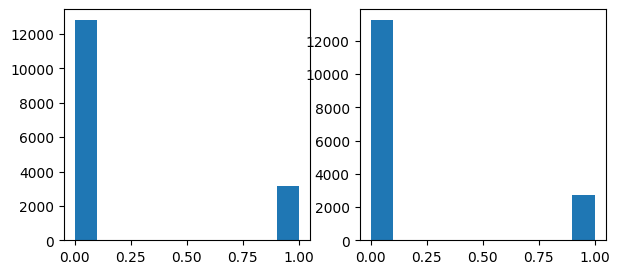

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
ax[0].hist(csv_df["red_light"])
ax[1].hist(csv_df["obj_ahead"])

In [47]:
rs = 783

X_train = np.array(csv_df.index)
y_train = np.array(csv_df[["speed", "red_light", "obj_ahead"]])

X_val = np.array(test_df.index)
y_val = np.array(test_df[["speed", "red_light", "obj_ahead"]])

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=rs)

print(np.unique(np.array(y_train), axis=0))

cases = np.unique(np.array(y_train), axis=0)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [48]:
X_train_path = [
    os.path.join(dataset_dir, str(image_id) + ".png") for image_id in X_train
]
X_val_path = [os.path.join(dataset_dir, str(image_id) + ".png") for image_id in X_val]

In [49]:
def decode_img(
    img,
):  # -> Any | defaultdict | Any | list | None | object | Tensor | ...:
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img


def process_path(file_path, labels):
    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, labels


def image_id_to_path(image_id, labels):
    image_path = tf.strings.join(
        [dataset_dir, "/", tf.as_string(image_id), ".png"]
    )  # Assuming images are .jpg
    return image_path, labels

In [50]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val_path, y_val))

train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

train_ds_length = tf.data.experimental.cardinality(train_ds).numpy()
print(train_ds_length)
val_ds_length = tf.data.experimental.cardinality(val_ds).numpy()
print(val_ds_length)

15973
2521


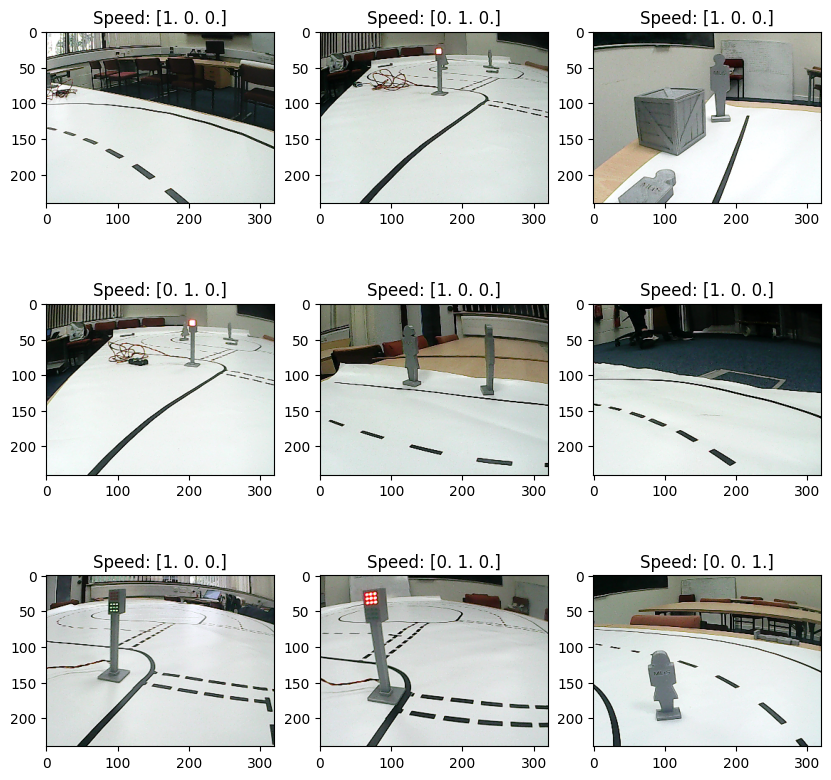

In [51]:
plt.figure(figsize=(10, 10))
i = 0

for image, labels in train_ds.take(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("float32"))
    labels = labels.numpy()
    plt.title(f"Speed: {labels}")
    i += 1

In [52]:
def visualise(original, augmented):
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Original image")
    plt.imshow(original.numpy().astype("float32"))

    plt.subplot(1, 2, 2)
    plt.title("Augmented image")
    plt.imshow(augmented.numpy().astype("float32"))

In [53]:
rotate_by_degree = 5
random_rotate = keras.layers.RandomRotation(rotate_by_degree / 360)


def augment(image, labels, seed=None):
    # Deal with the random seed
    if seed == None:
        seed = tf.random.uniform(shape=[2], maxval=10000, dtype=tf.int32)
    else:
        seed = tf.constant([seed, seed], dtype=tf.int32)

    image = tf.image.stateless_random_brightness(image, 0.3, seed)
    image = tf.image.stateless_random_contrast(image, 0.75, 1.25, seed)
    image = tf.image.stateless_random_hue(image, 0.05, seed)
    image = tf.image.stateless_random_saturation(image, 0.7, 1.2, seed)
    image = tf.image.stateless_random_jpeg_quality(image, 80, 100, seed)

    image = random_rotate(image)

    # crop image
    image = tf.image.stateless_random_crop(image, size=[210, 280, 3], seed=seed)

    # resize image back to 240x320
    image = tf.image.resize(image, [240, 320])

    return image, labels

Test augment function

20
Augmented image shape: (240, 320, 3)


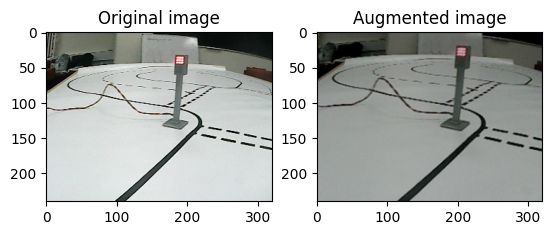

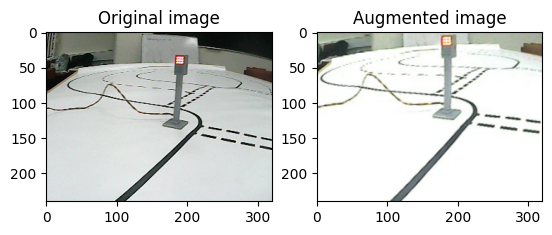

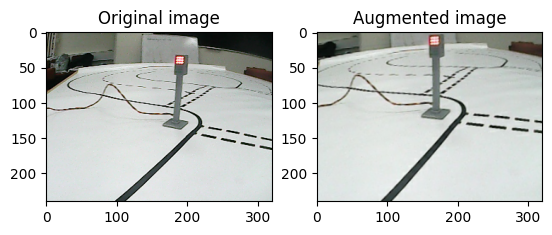

In [54]:
skip = 20
# skip+=1
print(skip)
for i in range(3):
    for image, labels in train_ds.skip(skip).take(1):
        augmented_image, speed = augment(image, labels, None)
        visualise(image, augmented_image)

for image, labels in train_ds.take(1):
    aug_image, aug_labels = augment(image, labels)
    print(f"Augmented image shape: {aug_image.shape}")

In [55]:
train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

In [56]:
def scale_ds(image, labels):
    # Range of input image: [0, 1]
    return image * 2 - 1.0, labels


train_ds = train_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)

In [57]:
def resize_ds(image, labels):
    return tf.image.resize(image, [image_size[0], image_size[1]]), labels


train_ds = train_ds.map(resize_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(resize_ds, num_parallel_calls=tf.data.AUTOTUNE)

In [58]:
for image, labels in train_ds.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Labels: {labels}")

Image shape: (120, 160, 3)
Labels: [1. 0. 0.]


In [59]:
def rephrase_ds(image, labels):
    # return image, {"speed1_output": speed, "speed2_output": speed, "speed3_output": speed}
    # speed_dict = {}
    # for i in range(10):
    #     speed_dict[f"speed{i}_output"] = speed

    return image, labels


train_ds = train_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)

In [60]:
batch_size = 64


def configure_for_performance(ds, shuffle: bool, batch: bool):
    if shuffle:
        ds = ds.shuffle(buffer_size=1000)
    if batch:
        ds = ds.batch(batch_size, drop_remainder=True)
    else:
        ds = ds.batch(1, drop_remainder=False)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds


train_ds = train_ds.repeat()
val_ds = val_ds.repeat()
train_ds = configure_for_performance(train_ds, shuffle=True, batch=True)
val_ds = configure_for_performance(val_ds, shuffle=False, batch=True)

### Build model

In [61]:
# print(y_train)
# class_weight = compute_class_weight("balanced", classes=np.array([0, 1]), y=y_train)
# class_weight_dict = {0: class_weight[0], 1: class_weight[1]}
# print(class_weight_dict)

In [62]:
y_classes = np.argmax(y_train, axis=1)
class_counts = np.bincount(y_classes)

# Use inverse square root
weights = 1.0 / np.sqrt(class_counts)

# Normalize so minimum weight is 1.0 (optional)
weights = weights / np.min(weights)

class_weight_dict = {i: float(w) for i, w in enumerate(weights)}

class_weight_dict

{0: 1.0, 1: 1.7805147713090144, 2: 1.924589337403452}

In [63]:
class_counts

array([10075,  3178,  2720])

In [64]:
image_shape = (image_size[0], image_size[1], 3)

base_model = keras.applications.MobileNetV3Small(
    include_top=False,
    weights="imagenet",
    input_shape=image_shape,
    pooling=None,
    include_preprocessing=False,
)
base_model.trainable = False

print(base_model.output.shape)

(None, 4, 5, 576)


In [65]:
feature_extractor = base_model.output

print(feature_extractor.shape)

s_model = []


# model 0
i = 0

s = feature_extractor

s = layers.Conv2D(30,(3, 3),(2, 2),padding="same",
                  kernel_initializer="he_uniform",name=f"s{i}_conv_1",)(feature_extractor)
s = layers.BatchNormalization(name=f"s{i}_bn_1")(s)
s = layers.Activation("relu", name=f"s{i}_relu_1")(s)
s = layers.GlobalAveragePooling2D(name=f"s{i}_GAP")(s)
# s = layers.Flatten(name=f"s{i}_flatten")(s)

s = layers.Dense(36, activation="relu", kernel_initializer="he_uniform", name=f"s{i}_dense_1")(s)
s = layers.Dropout(0.5, name=f"s{i}_dropout")(s)
s = layers.Dense(3, activation="softmax", name=f"s{i}_output")(s)

s_model.append(s)


outputs_dict = {}
loss_dict = {}
metrics_dict = {}

for i in range(len(s_model)):
    outputs_dict[f"speed{i}_output"] = s_model[i]
    loss_dict[f"speed{i}_output"] = WeightedCrossEntropy(class_weight_dict)
    metrics_dict[f"speed{i}_output"] = [
        "mse",
        "accuracy",
        BalancedAccuracyMetrics.balanced_accuracy,
    ]


model = Model(inputs=base_model.input, outputs=outputs_dict, name="speed_model")

learning_rate = 0.0010

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=loss_dict,
    metrics=metrics_dict,
)

# model.summary()

(None, 4, 5, 576)


In [66]:
# sub_model = Model(inputs=feature_extractor, outputs=outputs_dict,
#                                                 name="speed_model")
# tf.keras.utils.plot_model(
#     sub_model,
#     show_shapes=True,  # Show input/output shapes
#     show_layer_names=True,  # Show layer names (e.g., "angle_hidden_2")
#     expand_nested=False,  # Keep it flat (no base_model nesting)
#     show_layer_activations=True,
#     dpi=96,  # Image resolution
# )

# print("Saved model image: model.png")

In [67]:
# def lr_schedule(epoch, lr):
#     FIRST_N_EPOCHS = 2

#     initial_lr = learning_rate
#     if epoch < FIRST_N_EPOCHS:
#         return max(initial_lr * 2, 0.002)
#     decay = 0.42
#     return initial_lr / (1 + ((epoch-FIRST_N_EPOCHS) // 3) * decay)

# # for epoch in range(100):
# #     print(f"Epoch {epoch+1:2d}: {lr_schedule(epoch, 0):.6f}")

### Train model

In [68]:
current_epoch = 1
NUM_OF_EPOCHS = 50


checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="checkpoints/model_epoch_{epoch:02d}.keras",
    save_weights_only=False,
    save_freq="epoch",
    verbose=1,
)


# Use this lr_schedule when re-gen data every epoch
def lr_schedule(epoch, lr):
    FIRST_N_EPOCHS = 2
    epoch = current_epoch - 1
    initial_lr = learning_rate
    if epoch < FIRST_N_EPOCHS:
        # return 0.002
        return max(initial_lr * 2, 0.002)
    # elif epoch > 46:
    #     return 0.0001
    decay = 0.42
    return initial_lr / (1 + ((epoch - FIRST_N_EPOCHS) // 3) * decay)
    # return max(initial_lr / (1 + ((epoch-FIRST_N_EPOCHS) // 3) * decay), 0.0001)


lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)


history_callback = keras.callbacks.History()

# outputs_dict = {}
# loss_dict = {}
# metrics_dict = {}

# for i in range(len(s_model)):
#     outputs_dict[f'speed{i}_output'] = s_model[i]
#     loss_dict[f'speed{i}_output'] = WeightedMeanSquaredError(class_weight_dict)
#     metrics_dict[f'speed{i}_output'] = ["mse", "accuracy"]

try:
    for i in range(NUM_OF_EPOCHS):
        print(f"\n{50*'*'}\nCurrent epoch: {current_epoch}", end="")

        if i == 40:
            for layer in base_model.layers[:-6]:
                layer.trainable = True            

        checkpoint = keras.callbacks.ModelCheckpoint(
            filepath=f"checkpoints/model_epoch_{current_epoch:02d}.keras",
            save_weights_only=False,
            save_freq="epoch",
            verbose=1,
        )

        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=1,
            steps_per_epoch=train_ds_length // batch_size,
            validation_steps=val_ds_length // batch_size,
            callbacks=[checkpoint, history_callback, lr_scheduler],
            verbose=1,
        )

        current_epoch += 1

except KeyboardInterrupt:
    print("Stopped early—saving history")
    with open("training_history.pkl", "wb") as f:
        pickle.dump(history_callback.history, f)


**************************************************
Current epoch: 1
Epoch 1: LearningRateScheduler setting learning rate to 0.002.
249/249 [==============================] - ETA: 0s - loss: 0.3898 - mse: 0.0526 - accuracy: 0.8981 - balanced_accuracy: 0.8845
Epoch 1: saving model to checkpoints/model_epoch_01.keras
249/249 [==============================] - 40s 144ms/step - loss: 0.3898 - mse: 0.0526 - accuracy: 0.8981 - balanced_accuracy: 0.8845 - val_loss: 0.2382 - val_mse: 0.0457 - val_accuracy: 0.9071 - val_balanced_accuracy: 0.9564 - lr: 0.0020

**************************************************
Current epoch: 2
Epoch 1: LearningRateScheduler setting learning rate to 0.002.
249/249 [==============================] - ETA: 0s - loss: 0.1657 - mse: 0.0216 - accuracy: 0.9578 - balanced_accuracy: 0.9564
Epoch 1: saving model to checkpoints/model_epoch_02.keras
249/249 [==============================] - 37s 139ms/step - loss: 0.1657 - mse: 0.0216 - accuracy: 0.9578 - balanced_accuracy: 

In [69]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))
train_ds = train_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(resize_ds, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = configure_for_performance(train_ds, shuffle=False, batch=True)

train_preds = model.predict(train_ds)

249/249 [==============================] - 16s 62ms/step


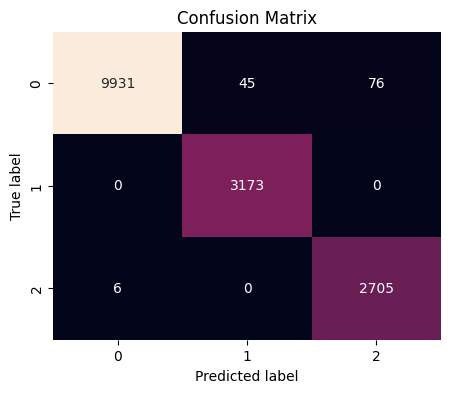

In [70]:
train_pred = train_preds[list(train_preds.keys())[0]]
train_pred = np.argmax(train_pred, axis=1)
true_train = np.argmax(y_train[:train_pred.shape[0]], axis=1)

cm = sklearn.metrics.confusion_matrix(true_train, train_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(true_train), yticklabels=np.unique(true_train))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

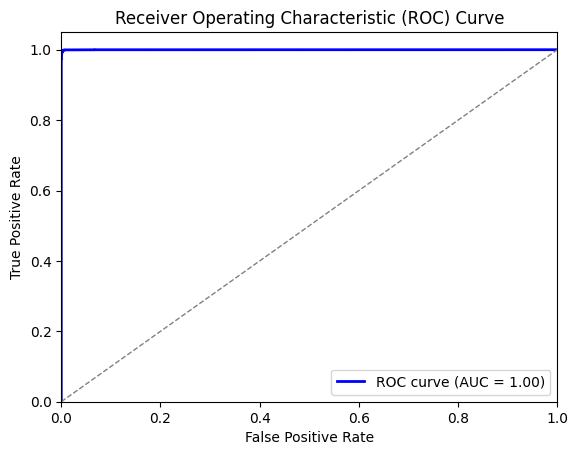

In [71]:
from sklearn.metrics import roc_curve, auc
tp = train_preds[list(train_preds.keys())[0]]
tp = tp[:, 0]
tt = y_train[:train_pred.shape[0], 0]

fpr, tpr, _ = roc_curve(tt, tp)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 1s 933ms/step
0.00039583444595336914


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.4030357599258423..1.0000000298023224].


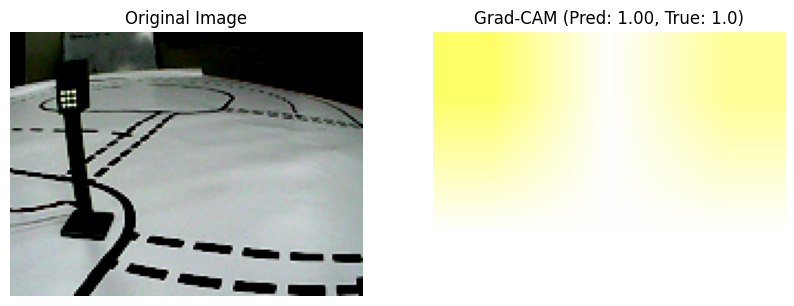

In [72]:
image_dir = "/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Captured_data/processed"
image_folder = "eight_green_03"

label_df = pd.read_csv(os.path.join(image_dir, image_folder, "_labels.csv")).set_index("image_id")

for _ in range(1):
    random_index = label_df.sample(n=1).index[0]

    image_path = random_index + ".png"
    image_full_path = os.path.join(image_dir, image_folder, image_path)

    label_df.loc[image_path.split(".")[0]]

    img = Image.open(image_full_path).resize((image_shape[1], image_shape[0]))  # Adjust size as per your model
    img_array = np.array(img) / 255.0 * 2 - 1
    img_array = np.expand_dims(img_array, axis=0)

    img_array.shape

    preds = model.predict(img_array)

    pred = preds["speed0_output"][0][0] 
    true_label = label_df.loc[image_path.split(".")[0]]['speed']
    print(true_label - pred)
    if true_label - pred > 0.5:
        break

last_conv_layer = model.get_layer('s0_conv_1')

grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions['speed0_output'][0][0]  # First output only

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Generate heatmap
heatmap = tf.reduce_mean(conv_outputs[0] * pooled_grads, axis=-1)
heatmap = np.maximum(heatmap, 0)  # ReLU
heatmap /= np.max(heatmap) + 1e-8  # Normalize

# Resize heatmap
heatmap = Image.fromarray(heatmap).resize((image_shape[1], image_shape[0]), Image.Resampling.BILINEAR)
heatmap = np.array(heatmap)

# Overlay heatmap on original image
original_img = img_array[0]
white_background = np.ones_like(original_img)  # All 1s = white in [0, 1] range
superimposed_img = original_img * 0.6 + heatmap[..., np.newaxis] * [1.0, 1.0, 0.0] * 0.6  # Red heatmap
shaded_img = white_background * (1 - heatmap[..., np.newaxis] * 0.6) + heatmap[..., np.newaxis] * [1.0, 1.0, 0.0] * 0.6
# Visualize
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')

# Grad-CAM overlay
plt.subplot(1, 2, 2)
plt.imshow(shaded_img)
plt.title(f"Grad-CAM (Pred: {pred:.2f}, True: {true_label})")  # Adjust 'label' to your column name
plt.axis('off')

plt.savefig('gradcam_result.png')
plt.show()

In [73]:
image_path

'1742995745082_105_0.png'

### Save model and plot

In [74]:
# temp = history_callback.history
# mse_dict = {}
# for key in temp.keys():
#   if key.endswith("mse"):
#     # print(f"{key}: {temp[key][-1]}")
#     mse_dict[key] = temp[key][-1]

# for i in range(int(len(mse_dict)/2)):
#   for key in mse_dict.keys():
#     if str(i) in key:
#       print(f"{key:20s}: {mse_dict[key]}")
# #   print(list(mse_dict.keys())[i])
# #   if mse_dict.keys[i].contains(i):
#     # print(f"{mse_dict.keys()[i]}: {mse_dict[mse_dict.keys()[i]]}")

In [75]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M")  # Format: YYYYMMDD_HHMM
name_template = f'speed_model_{timestamp}'

folder_path = f"Models/{name_template}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

filename = f"{folder_path}/{name_template}.keras"
model.save(filename)
filename = f"{folder_path}/{name_template}.weights.h5"
model.save_weights(filename)

history = history_callback.history

filename = f"{folder_path}/{name_template}_history.pkl"
with open(filename, 'wb') as f:
    pickle.dump(history, f)

loss
balanced_accuracy


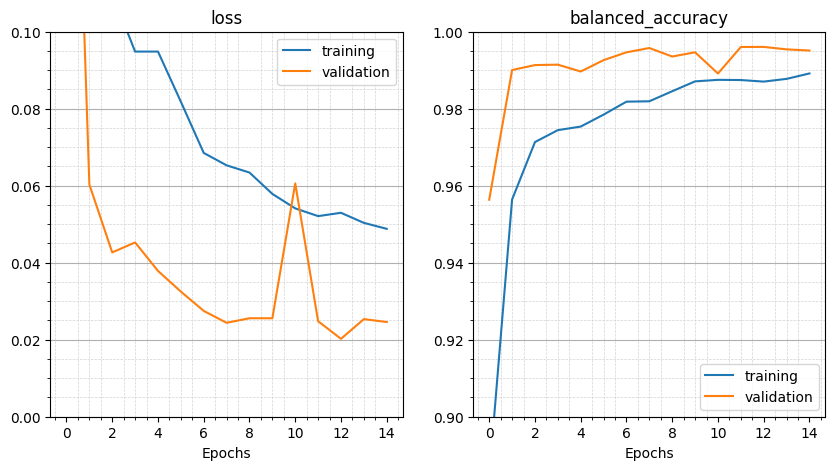

In [76]:
history = history_callback.history
wanted = ["loss", "balanced_accuracy"]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax = ax.ravel()

for i in range(len(ax)):
    print(wanted[i])
    for key in history.keys():
        if key.endswith(wanted[i]):
            legend = "training"
            if "val" in key:
                legend = "validation"
            ax[i].plot(history[key], label=legend)
            ax[i].set_title(wanted[i])
            ax[i].set_xlabel("Epochs")
            ax[i].legend()
            ax[i].minorticks_on()
            ax[i].grid(True, axis="y")
            ax[i].grid(which='minor', linestyle='--', linewidth=0.5, color='lightgray')

ax[0].set_ylim(0, 0.1)
ax[1].set_ylim(0.9, 1)            

fig.savefig(f"{folder_path}/{name_template}_performance.png")

In [77]:
# old_csv_df = csv_df

In [78]:
val_ds = tf.data.Dataset.from_tensor_slices((X_val_path, y_val))
val_ds = val_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(resize_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = configure_for_performance(val_ds, shuffle=False, batch=False)

In [79]:
preds = model.predict(val_ds)

2521/2521 [==============================] - 20s 8ms/step


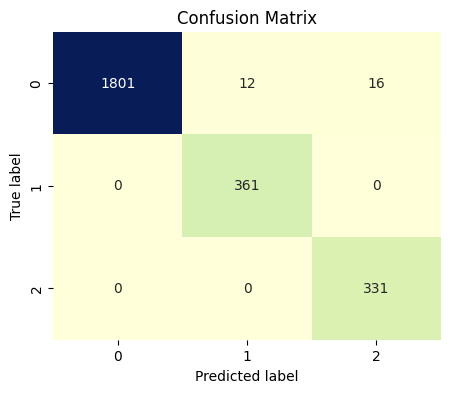

In [80]:
pred = preds[list(preds.keys())[0]]
pred = np.argmax(pred, axis=1)
true_val = np.argmax(y_val, axis=1)

cm = sklearn.metrics.confusion_matrix(true_val, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap="YlGnBu",
            xticklabels=np.unique(true_val), yticklabels=np.unique(true_val))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

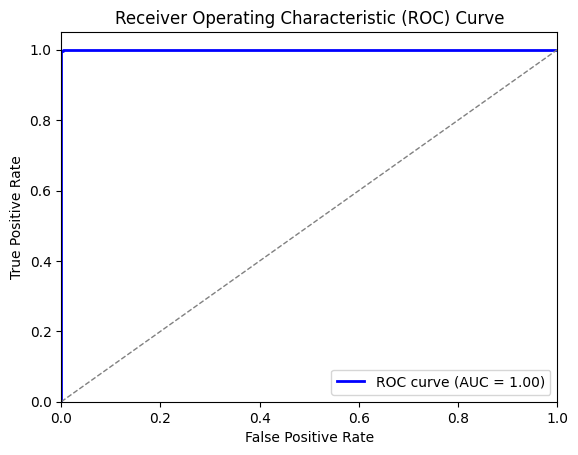

In [81]:
tp = preds[list(preds.keys())[0]]
tp = tp[:, 0]
tt = y_val[:pred.shape[0], 0]

fpr, tpr, _ = roc_curve(tt, tp)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Captured_data/processed/eight_green_2/1742325502370_105_0.png
/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Captured_data/processed/eight_go_2/1742312688696_75_35.png
/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Captured_data/processed/eight_green_01/1742993612533_105_0.png
/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Captured_data/processed/oval_go/1741957289236_110_35.png
/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Captured_data/processed/oval_go/1741709523346_90_35.png
/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science

IndexError: index 20 is out of bounds for axis 0 with size 20

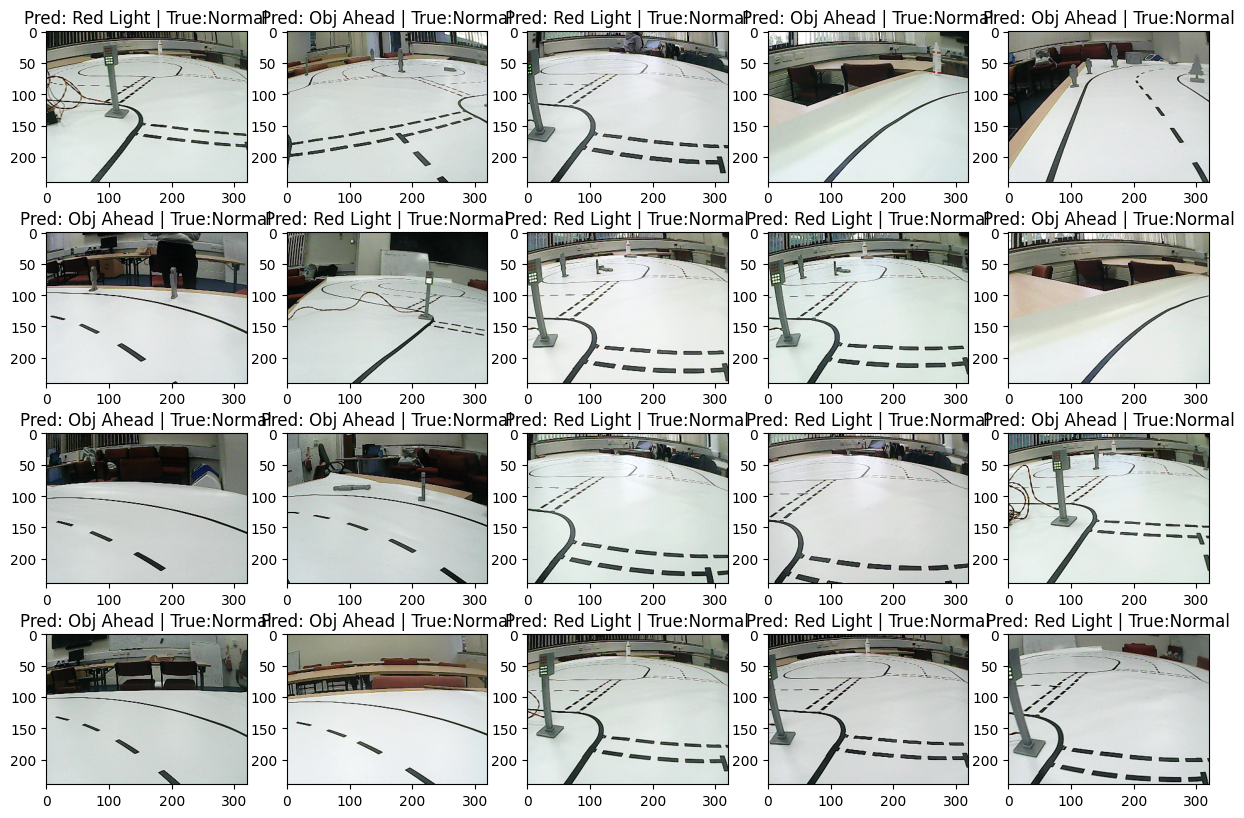

In [82]:
fig, ax = plt.subplots(4, 5, figsize=(15, 10))
ax = ax.ravel()

image_count = 0

interpretation = {
    0: "Normal",
    1: "Red Light",
    2: "Obj Ahead"
}

for i in range(len(pred)):
    if pred[i] != true_val[i]:
        image = Image.open(X_val_path[i])
        print(X_val_path[i])
        ax[image_count].imshow(image)
        ax[image_count].set_title(f"Pred: {interpretation[pred[i]]} | True:{interpretation[true_val[i]]}")
        image_count += 1
        # print(f"{i}: {pred[i]} | {true_val[i]}")

In [ ]:
dataset_dir = "/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Dataset/machine-learning-in-science-ii-2025"
# dataset_dir = "/kaggle/input/machine-learning-in-science-ii-2025"

csv_path = os.path.join(dataset_dir, "training_norm.csv")
csv_df = pd.read_csv(csv_path, index_col="image_id")

training_data_dir = os.path.join(dataset_dir, "training_data", "training_data")

# there is one speed > 1. So change it.
csv_df.loc[csv_df["speed"] > 1, "speed"] = 1

csv_df.drop(columns=["angle"], inplace=True)
csv_df = csv_df[csv_df.index.isin(old_csv_df.index)]

X = np.array(csv_df.index)
y = np.array(csv_df["speed"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=rs)

X_val_path = [
    os.path.join(training_data_dir, str(image_id) + ".png") for image_id in X_val
]

val_ds = tf.data.Dataset.from_tensor_slices((X_val_path, y_val))
val_ds = val_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
# val_ds = val_ds.map(enhance_red, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(scale_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(rephrase_ds, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = configure_for_performance(val_ds, shuffle=False, batch=False)

# model = keras.models.load_model("/mnt/c/Users/psamt/OneDrive - The University of Nottingham/_Spring/PHYS4036_Machine Learning in Science Part II/Project/Models/speed_model_20250307_1641/speed_model_20250307_1641.keras")

pred = model.predict(val_ds)

NameError: name 'old_csv_df' is not defined

In [ ]:
y_pred = []
for key in pred.keys():
    print(key, end=", ")
    temp = pred[key][:, 0]
    y_pred.append(temp)

y_pred_mean = np.mean(y_pred, axis=0)

# y_pred.append(y_pred_mean)

y_pred = np.array(y_pred)
y_pred = y_pred - 0.5

y_pred = y_pred.T


def y_pred_map(y_pred):
    if abs(np.mean(y_pred)) > 0.35:
        return np.sign(np.mean(y_pred)) * 0.5 + 0.5
        return round(np.mean(y_pred), 1) + 0.5
    else:
        return np.mean(y_pred) + 0.5


y_pred_2 = []

for i in range(len(y_pred)):
    y_pred_2.append(y_pred_map(y_pred[i]))


y_pred_mean = (np.mean(y_pred, axis=1) > 0).astype(int)

speed0_output, speed1_output, speed2_output, speed3_output, speed4_output, speed5_output, speed6_output, speed7_output, speed8_output, speed9_output, 

In [ ]:
y_pred = []
for key in pred.keys():
    print(key, end=", ")
    temp = pred[key][:, 0]
    y_pred.append(temp)

y_pred_mean = np.mean(y_pred, axis=0)

# y_pred.append(y_pred_mean)

y_pred = np.array(y_pred)
y_pred = y_pred - 0.5

y_pred = y_pred.T


def y_pred_map(y_pred, threshold):
    if abs(np.mean(y_pred)) > threshold:
        return np.sign(np.mean(y_pred)) * 0.5 + 0.5
        return round(np.mean(y_pred), 1) + 0.5
    else:
        return np.mean(y_pred) + 0.5


threshold = 0.2

while True:
    y_pred_2 = []

    for i in range(len(y_pred)):
        y_pred_2.append(y_pred_map(y_pred[i], threshold))

    print(f"Threshold: {threshold:.2f}", end="    ")
    print(sum((y_val - y_pred_2) ** 2) / len(y_val))

    threshold += 0.02
    if threshold > 0.5:
        break

speed0_output, speed1_output, speed2_output, speed3_output, speed4_output, speed5_output, speed6_output, speed7_output, speed8_output, speed9_output, Threshold: 0.20    0.012459610676540818
Threshold: 0.22    0.012459610676540818
Threshold: 0.24    0.012270532143684417
Threshold: 0.26    0.012061410855601223
Threshold: 0.28    0.012061410855601223
Threshold: 0.30    0.011916347401221107
Threshold: 0.32    0.011800948837091462
Threshold: 0.34    0.01169795616184452
Threshold: 0.36    0.011582373674922961
Threshold: 0.38    0.011488166649863584
Threshold: 0.40    0.011493587623527382
Threshold: 0.42    0.011530488215391096
Threshold: 0.44    0.011540722874078488
Threshold: 0.46    0.01154876324600486
Threshold: 0.48    0.011479375335969697


speed0_output, speed1_output, speed2_output, speed3_output, speed4_output, speed5_output, speed6_output, speed7_output, speed8_output, speed9_output, 
[1 0 1 ... 0 1 0]


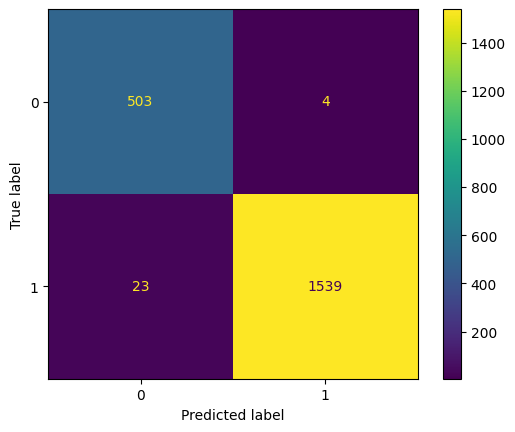

IndexError: index 27 is out of bounds for axis 0 with size 27

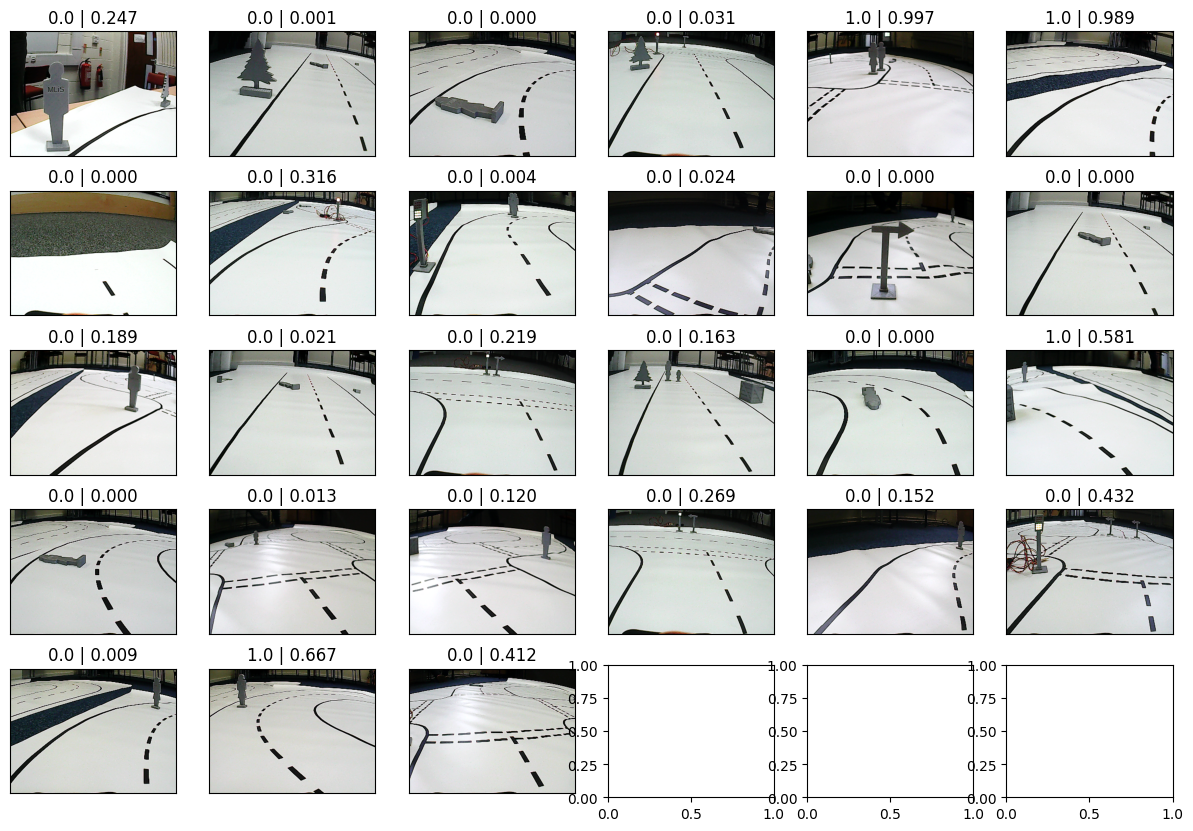

In [ ]:
y_pred = []
for key in pred.keys():
    print(key, end=", ")
    temp = pred[key][:, 0]
    y_pred.append(temp)

print()

y_pred = np.mean(y_pred, axis=0)
y_pred_value = y_pred

y_pred = (y_pred > 0.5).astype(int)
y_val

print(y_pred)

cm = sklearn.metrics.confusion_matrix(y_val, y_pred)

disp = sklearn.metrics.ConfusionMatrixDisplay(cm)

disp.plot()

plt.savefig("confusion_matrix.png")
plt.show()

wrong_id = []
wrong_label = []
wrong_pred = []
wrong_pred_values = []

for i in range(len(y_pred)):
    if y_pred[i] != y_val[i]:
        wrong_id.append(X_val[i])
        wrong_label.append(int(y_val[i]))
        wrong_pred.append(y_pred[i])
        wrong_pred_values.append(y_pred_value[i])
        # print(f"Id: {X_val[i]:5d}, Label: {int(y_val[i])}, Pred: {y_pred[i]}")

wrong_df = pd.DataFrame(
    {
        "id": wrong_id,
        "label": wrong_label,
        "pred": wrong_pred,
        "value": wrong_pred_values,
    }
)
wrong_df.set_index("id", inplace=True)
wrong_df.sort_index(inplace=True)
# print(wrong_df)

fig, ax = plt.subplots(5, 6, figsize=(15, 10))
ax = ax.ravel()

for i in range(len(ax)):
    img_path, _ = image_id_to_path(wrong_df.index[i], 1)
    img = Image.open(img_path.numpy())
    ax[i].imshow(img)
    ax[i].set_title(
        f"{wrong_df.loc[wrong_df.index[i]]['pred']} | {wrong_df.loc[wrong_df.index[i]]['value']:.3f}"
    )
    ax[i].set_xticks([])
    ax[i].set_yticks([])